### Задание

Решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

### Этапы работы:

1) Получите данные и загрузите их в рабочую среду.

2) Проведите первичный анализ.
**а)** Проверьте количество записей для каждого класса. Сделайте вывод.

3) Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4) Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

5) Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

6) Обработайте выбросы в данных.
**а)** Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.  Есть ли признаки с нормальным распределением?
**b)** Исследуйте признаки на выбросы несколькими способами.
**c)** Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

7) Повторите п. 4, п. 5.

8) Сформулируйте выводы по проделанной работе.
**а)** Кратко опишите, какие преобразования были сделаны с данными.
**b)** Сравните точность двух моделей.
**c)** Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.duplicated().sum()

1

In [4]:
data = data.drop_duplicates()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


### Первичный анализ

In [7]:
data['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Наблюдается преобладание записей 1 и 2 класса и совсем небольшое количество записей для 6 класса. Из этого мы можем сделать вывод, что у нас датасет с несбалансированными классами.

In [11]:
data.groupby(['Type']).mean()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,1.518669,13.228261,3.548551,1.173913,72.631449,0.452319,8.786087,0.012899,0.057826
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


Проанализировав среднии данные по классам, можно сделать вывод, что небольшое количество записей для класса 6 не должно повлиять на модель, так как по средним мы видим, что 6 класс характеризуется полным отсуствием в составе K, Ba, Fe в отличии от других классов, т.е. его легко можно идентифицировать

### Обучение модели дерева решений RandomForestClassifier

In [13]:
X = data[data.columns[:-1]]
y = data['Type']

model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model.fit(X_train, y_train)

RandomForestClassifier()

### Для тестового множества предскажим тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy)

In [65]:
pred_type = model.predict(X_test)
print(f'Точность предсказания модели: {accuracy_score(y_test, pred_type)}')

Точность предсказания модели: 0.813953488372093


### Обработайте выбросы в данных.

In [77]:
def make_plot(column):
    sns.boxplot(data[column], orient='h')
    sns.displot(data[column])
    print(f'Критерий Шапиро для проверки нормальности распределения: {shapiro(data[column])}')

Критерий Шапиро для проверки нормальности распределения: ShapiroResult(statistic=0.8649588227272034, pvalue=8.434215782379684e-13)


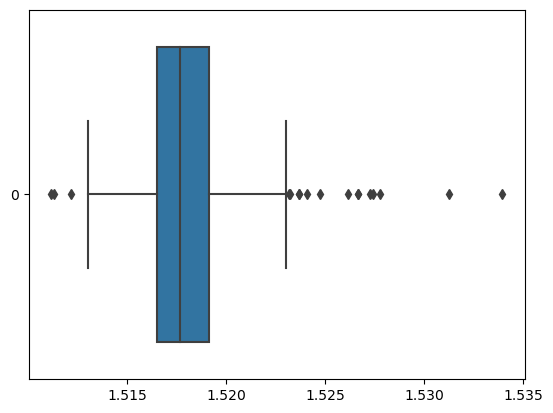

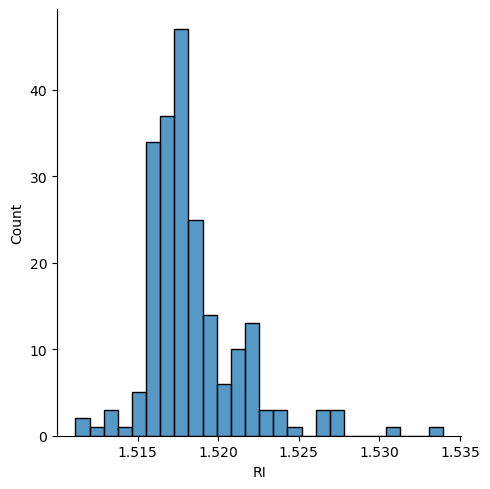

In [80]:
make_plot('RI')

Критерий Шапиро для проверки нормальности распределения: ShapiroResult(statistic=0.9447407126426697, pvalue=2.930406992618373e-07)


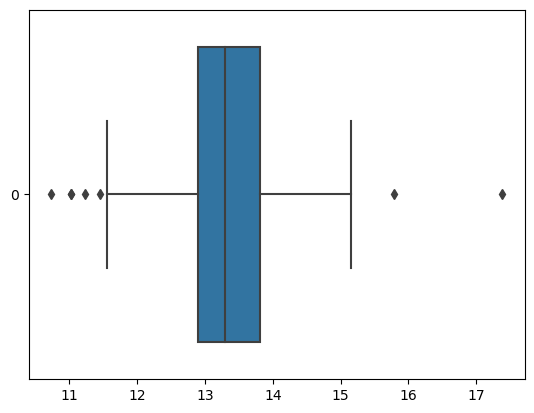

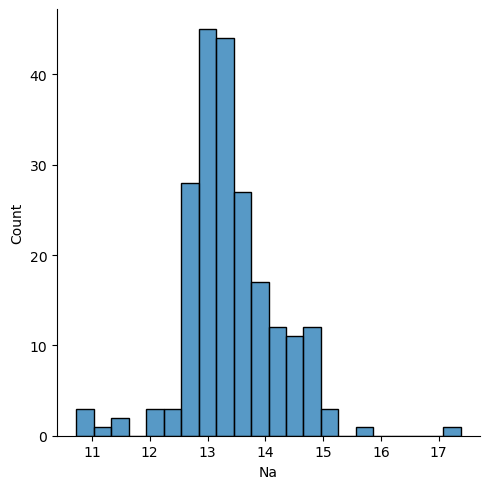

In [81]:
make_plot('Na')

Критерий Шапиро для проверки нормальности распределения: ShapiroResult(statistic=0.6999149322509766, pvalue=2.7616334648756637e-19)


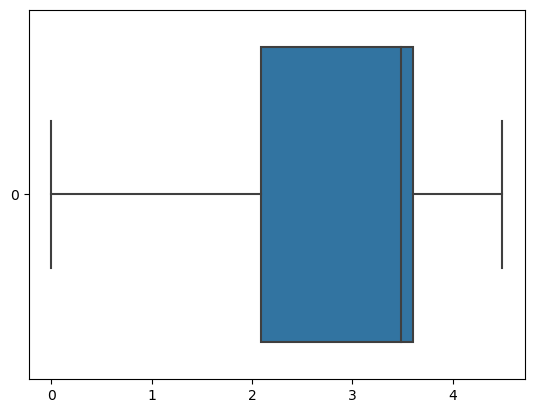

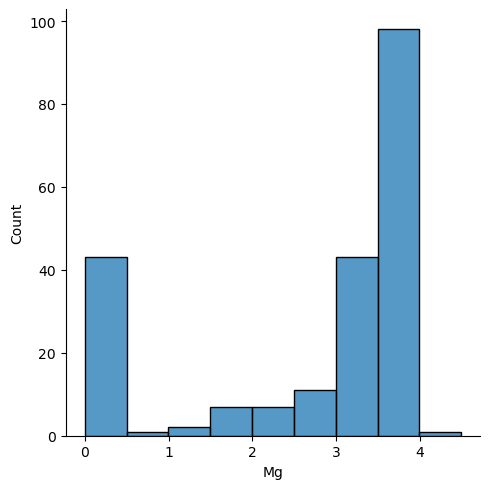

In [82]:
make_plot('Mg')

Критерий Шапиро для проверки нормальности распределения: ShapiroResult(statistic=0.9415011405944824, pvalue=1.4700569295200694e-07)


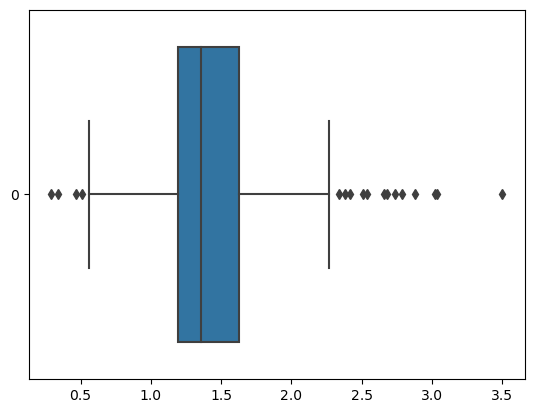

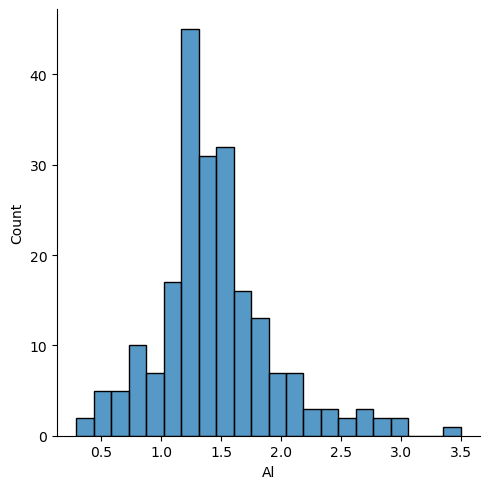

In [83]:
make_plot('Al')

Критерий Шапиро для проверки нормальности распределения: ShapiroResult(statistic=0.9178295135498047, pvalue=1.6946732905864792e-09)


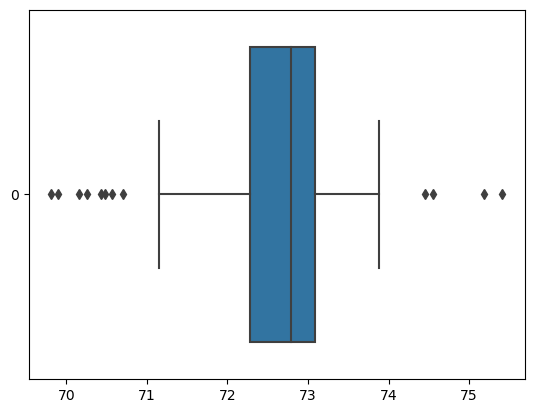

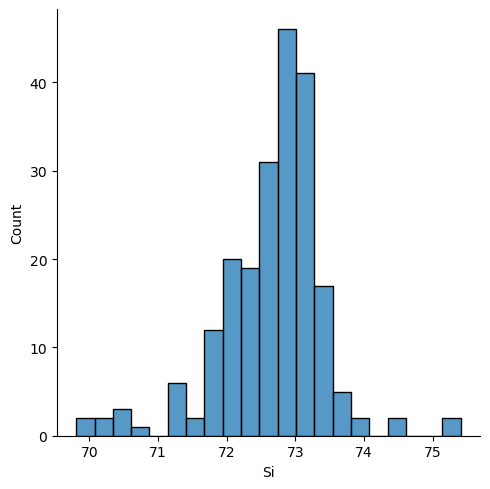

In [84]:
make_plot('Si')

Критерий Шапиро для проверки нормальности распределения: ShapiroResult(statistic=0.44111430644989014, pvalue=2.4059535308474517e-25)


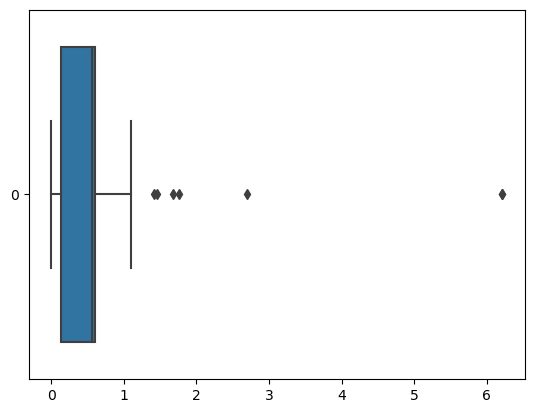

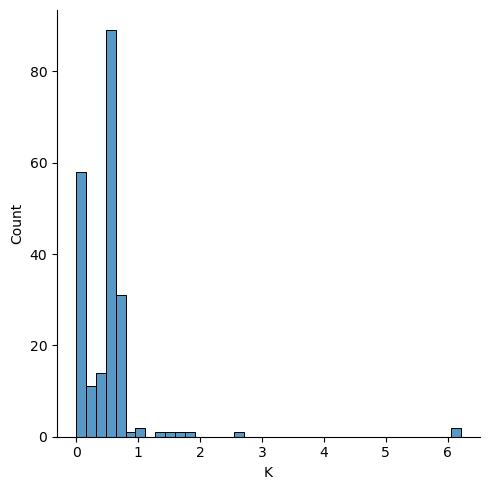

In [85]:
make_plot('K')

Критерий Шапиро для проверки нормальности распределения: ShapiroResult(statistic=0.7924720048904419, pvalue=4.140469629142023e-16)


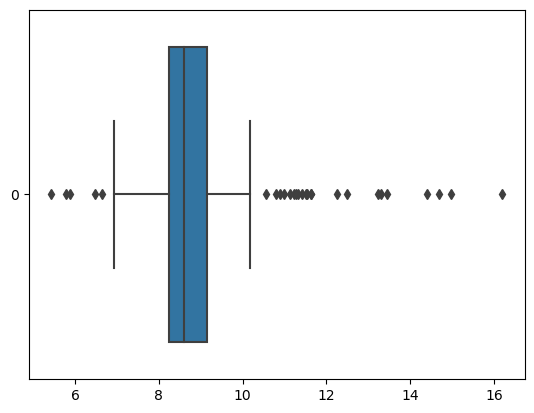

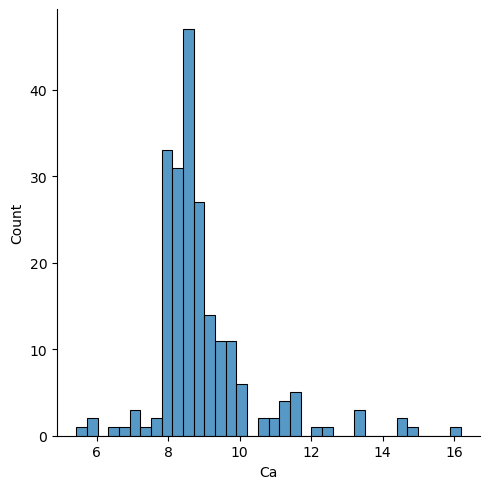

In [86]:
make_plot('Ca')

Критерий Шапиро для проверки нормальности распределения: ShapiroResult(statistic=0.40972548723220825, pvalue=6.404264337340556e-26)


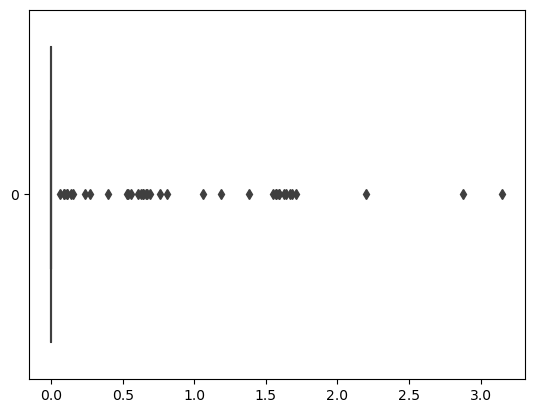

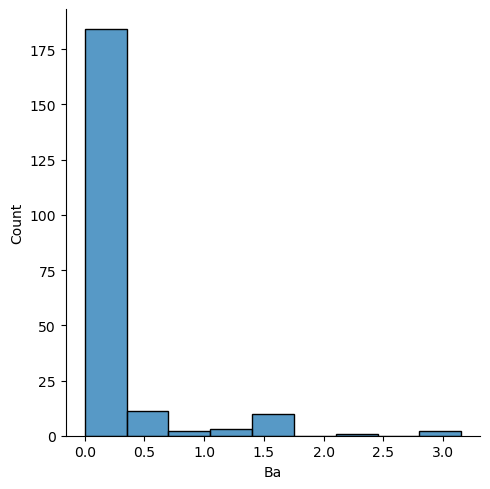

In [87]:
make_plot('Ba')

Критерий Шапиро для проверки нормальности распределения: ShapiroResult(statistic=0.6547442674636841, pvalue=1.4194406386712884e-20)


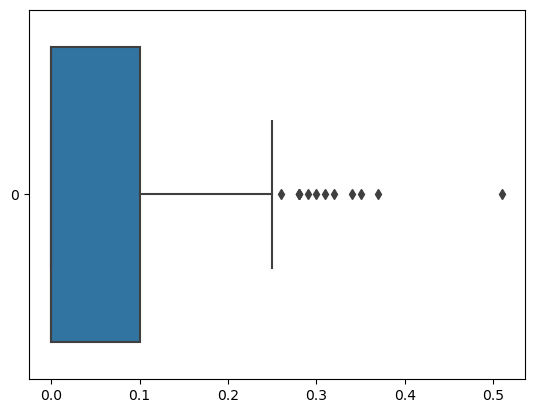

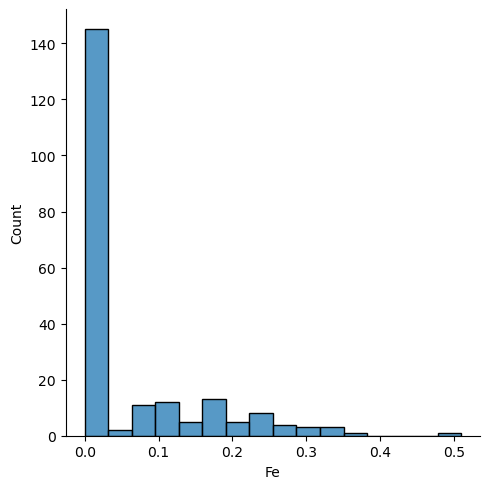

In [88]:
make_plot('Fe')

In [89]:
data[(data['RI'] < 1.512) | (data['RI'] > 1.525)]['Type'].value_counts()

2    7
1    1
6    1
7    1
Name: Type, dtype: int64

In [90]:
data[(data['Na'] <= 11) | (data['Na'] >= 16)]['Type'].value_counts()

2    1
6    1
Name: Type, dtype: int64

In [91]:
data[data['Al'] >= 3]['Type'].value_counts()

5    3
Name: Type, dtype: int64

In [92]:
data[(data['Si'] <= 70) | (data['Si'] >= 75)]['Type'].value_counts()

2    1
5    1
6    1
7    1
Name: Type, dtype: int64

In [93]:
data[data['K'] >= 2]['Type'].value_counts()

5    2
7    1
Name: Type, dtype: int64

In [94]:
data[(data['Ca'] <= 6) | (data['Ca'] >= 12)]['Type'].value_counts()

2    7
5    3
7    2
Name: Type, dtype: int64

In [95]:
data[data['Ba'] >= 2]['Type'].value_counts()

2    1
5    1
7    1
Name: Type, dtype: int64

In [96]:
data[data['Fe'] >= 0.35]['Type'].value_counts()

2    1
3    1
5    1
Name: Type, dtype: int64

По анализу графиков мы можем сказать, что выбросы в основном принадлежат 2, 5 и 7 классам. Если 2 и 7 классы у нас многочисленные и удаление записей с выбросами не критично, то 5 класс у нас содержит всего 13 записей, поэтому удаление записей из него может привести к уменьшению качества модели.

По критерию Шапиро-Уилка среди признаков нет тех, что нормально распределены

### Удаление выбросов

In [113]:
data_clear = data.copy()

Было принято решение увеличить отклонение значения с 1.5 до 1.75 IQR

In [100]:
def get_outliers(data):
  Q1 = np.percentile(data, 25, method = 'midpoint')
  Q3 = np.percentile(data, 75, method = 'midpoint')
  IQR = Q3 - Q1
  outliers = data[(data < Q1 - (1.75 * IQR)) | (data > Q3 + (1.75 * IQR))]
  return outliers

Так как выбросы Fe относятся к классу 5, то исключим его Fe из датафрейма

In [103]:
for value in data.columns.values.tolist():
  if ((value != 'Type') & (value != 'Fe')):
    print("Выбросы у " + value)
    print(get_outliers(data_clear[value]))
    print('---------------------------')

Выбросы у RI
47     1.52667
103    1.52725
104    1.52410
105    1.52475
106    1.53125
107    1.53393
110    1.52664
111    1.52739
112    1.52777
131    1.52614
184    1.51115
185    1.51131
Name: RI, dtype: float64
---------------------------
Выбросы у Na
106    10.73
110    11.23
111    11.02
166    11.03
184    17.38
189    15.79
Name: Na, dtype: float64
---------------------------
Выбросы у Mg
Series([], Name: Mg, dtype: float64)
---------------------------
Выбросы у Al
21     0.29
163    3.50
171    3.04
172    3.02
184    0.34
192    2.79
195    2.68
196    2.54
198    2.66
199    2.51
202    2.42
208    2.74
209    2.88
Name: Al, dtype: float64
---------------------------
Выбросы у Si
103    70.57
106    69.81
107    70.16
163    69.89
171    70.48
172    70.70
180    74.55
184    75.41
188    70.26
189    70.43
201    75.18
Name: Si, dtype: float64
---------------------------
Выбросы у K
163    1.68
171    6.21
172    6.21
185    1.76
186    1.46
201    2.70
Name: K, dtype: f

Записей 5 и 6 класса у нас очень мало, поэтому не будем исключать их как выбросы

In [114]:
safe = data_clear[(data_clear['Type'] == 5) | (data_clear['Type'] == 6)]

In [115]:
data_clear = data_clear[(data_clear['Type'] != 5) & (data_clear['Type'] != 6)]
data_clear = data_clear[(data_clear['RI'] > 1.512) & (data_clear['RI'] < 1.525)]
data_clear = data_clear[((data_clear['Na'] > 11) & (data_clear['Na'] < 16))]
data_clear = data_clear[((data_clear['Si'] > 70) & (data_clear['Si'] < 75))]
data_clear = data_clear[(data_clear['K'] < 2)]
data_clear = data_clear[((data_clear['Ca'] > 6) & (data_clear['Ca'] < 12))]
data_clear = data_clear[(data_clear['Ba'] < 2)]

In [116]:
data_clear = pd.concat([data_clear, safe], axis = 0)

In [117]:
for value in data['Type'].unique():
  outliers_percent = round(100 - (data_clear[data_clear['Type'] == value].size / data[data['Type'] == value].size * 100), 2)
  print(f'Число удалённых выбросов для класса {value} составило {outliers_percent}%')

Число удалённых выбросов для класса 1 составило 1.45%
Число удалённых выбросов для класса 2 составило 10.53%
Число удалённых выбросов для класса 3 составило 0.0%
Число удалённых выбросов для класса 5 составило 0.0%
Число удалённых выбросов для класса 6 составило 0.0%
Число удалённых выбросов для класса 7 составило 13.79%


### Обучение модели дерева решений RandomForestClassifier после удаления выбросов

In [118]:
X = data_clear[data_clear.columns[:-1]]
y = data_clear['Type']

model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model.fit(X_train, y_train)

RandomForestClassifier()

In [119]:
pred_type = model.predict(X_test)
print(f'Точность предсказания модели: {accuracy_score(y_test, pred_type)}')

Точность предсказания модели: 0.825


### Вывод

Было произведён поиск выбросов, анализ влияния их на классовый состав целевой переменной. Также было принято решение не исключать выбросы из 5 и 6 классов. После удаления выбросов точность модели увеличилась с **0.8139** до **0.825**

Поиск и исключения выбросов позволяет повысить точность предсказания модели. Но нужно обязательно обращать внимание на случаи с несколькими классами, когда один из классов характеризуется именно на основании данных, отличающихся от средних.